# Dijkstra's Algorithm
## Single Source Shortest Path (in a weighted graph)
### Note: Dijkstra's Algorithm works only for non-negative weights

In [5]:
import numpy as np


In [6]:
# Overall O(n^2) - Using Adjacency Matrix
def dijkstra(WMat,s): #s is source, WMat is weighted adjacency Matrix
    
    (rows,cols,x)=WMat.shape #x=0 is wether there is an edge bw i to j, x=1 is weight b/w i & j.
    
    #O(n^2)
    infinity=np.max(WMat)*rows+1 #Let infinity be max weight * longest path
    
    visited,distance={},{}
    for v in range(rows):
        visited[v],distance[v]=False,infinity
    
    distance[s]=0

    
    for u in range(rows): #O(n)

        #Find out what are minimum vertex are there #O(n)
        nextd=min(distance[v] for v in range(rows) if not visited[v])
        nextvlist=[v for v in range(rows) if (not visited[v] and distance[v]==nextd)]

        #if we dont get any vertex
        if nextvlist==[]:
            break

        nextv=min(nextvlist)
        visited[nextv]=True

        #update the time for connected vertex #O(n)
        for v in range(cols):
            if WMat[nextv,v,0]==1 and (not visited[v]):
                distance[v]=min(distance[v],distance[nextv]+WMat[nextv,v,1])
    
    return distance


In [26]:
# Using Adjacency List - O(n^2)

def dijkstralist(Wlist,s):
    
    #O(m)
    infinity=1+len(Wlist.keys())*max([d for u in Wlist.keys()for (v,d) in Wlist[u]])

    visited,distance={},{}
    for v in Wlist.keys():
        visited[v],distance[v]=False,infinity
    
    distance[s]=0

    
    for _ in Wlist.keys(): #O(n)
        
        #O(n)
        # Find the minimum distance among unvisited vertices
        nextd = min((distance[v] for v in Wlist.keys() if not visited[v]), default=None)
        if nextd is None:
            break
        # Get the vertex with the minimum distance
        nextvlist = [v for v in Wlist.keys() if not visited[v] and distance[v] == nextd]
        
        if not nextvlist:
            break
        
        nextv = min(nextvlist)
        visited[nextv] = True

        #Updation - O(m)
        for (v,d) in Wlist[nextv]:
            if not visited[v]:
                distance[v]=min(distance[v],distance[nextv]+d)
        
    return distance


# TESTING

In [27]:
# Generated using Copilot
# Test Cases

import networkx as nx
# Test case for dijkstra function using adjacency matrix
WMat = np.array([
    [[0, 0], [1, 4], [1, 1], [0, 0]],
    [[1, 4], [0, 0], [1, 2], [1, 5]],
    [[1, 1], [1, 2], [0, 0], [1, 8]],
    [[0, 0], [1, 5], [1, 8], [0, 0]]
])
source = 0
print("Test case for dijkstra function using adjacency matrix:")
print(dijkstra(WMat, source))

# Test case for dijkstralist function using adjacency list
Wlist = {
    0: [(1, 4), (2, 1)],
    1: [(0, 4), (2, 2), (3, 5)],
    2: [(0, 1), (1, 2), (3, 8)],
    3: [(1, 5), (2, 8)]
}
source = 0
print("Test case for dijkstralist function using adjacency list:")
print(dijkstralist(Wlist, source))


Test case for dijkstra function using adjacency matrix:
{0: 0, 1: 3, 2: 1, 3: 8}
Test case for dijkstralist function using adjacency list:
{0: 0, 1: 3, 2: 1, 3: 8}


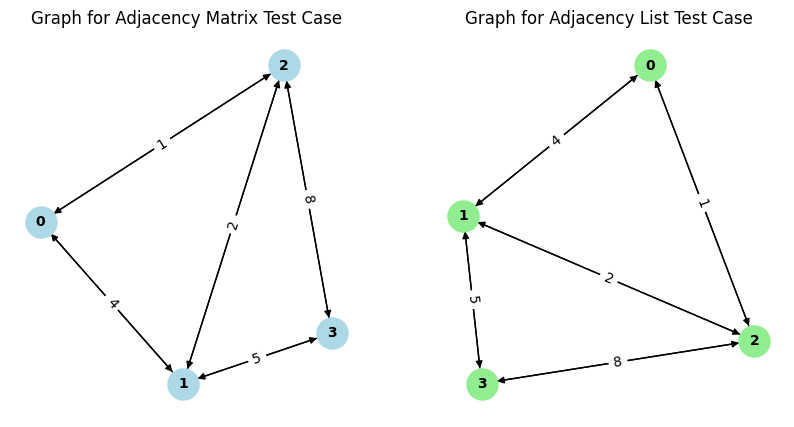

In [9]:
#Graph for the test case -  Generated Using Copilot
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph for the adjacency matrix test case
G_matrix = nx.DiGraph()
edges_matrix = [(0, 1, 4), (0, 2, 1), (1, 0, 4), (1, 2, 2), (1, 3, 5), (2, 0, 1), (2, 1, 2), (2, 3, 8), (3, 1, 5), (3, 2, 8)]
G_matrix.add_weighted_edges_from(edges_matrix)

plt.figure(figsize=(10, 5))
plt.subplot(121)
pos = nx.spring_layout(G_matrix)
nx.draw(G_matrix, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G_matrix, 'weight')
nx.draw_networkx_edge_labels(G_matrix, pos, edge_labels=labels)
plt.title("Graph for Adjacency Matrix Test Case")

# Create a graph for the adjacency list test case
G_list = nx.DiGraph()
edges_list = [(0, 1, 4), (0, 2, 1), (1, 0, 4), (1, 2, 2), (1, 3, 5), (2, 0, 1), (2, 1, 2), (2, 3, 8), (3, 1, 5), (3, 2, 8)]
G_list.add_weighted_edges_from(edges_list)

plt.subplot(122)
pos = nx.spring_layout(G_list)
nx.draw(G_list, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G_list, 'weight')
nx.draw_networkx_edge_labels(G_list, pos, edge_labels=labels)
plt.title("Graph for Adjacency List Test Case")

plt.show()
